In [1]:
!pip install --upgrade pandas-datareader

!pip install --upgrade pandas

  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.0
    Uninstalling pandas-1.3.0:
      Successfully uninstalled pandas-1.3.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
start = '2010-01-01'
end = '2022-12-31'

df = data.DataReader('AAPL','yahoo',start,end)

In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-07,149.000000,144.100006,144.350006,148.710007,67808200.0,148.710007
2022-06-08,149.869995,147.460007,148.580002,147.960007,53950200.0,147.960007
2022-06-09,147.949997,142.529999,147.080002,142.639999,69473000.0,142.639999
2022-06-10,140.759995,137.059998,140.279999,137.130005,91437900.0,137.130005
2022-06-13,135.199997,132.570007,132.869995,133.379898,37882207.0,133.379898


In [8]:
df = df.reset_index()

In [9]:
df = df.drop(['Date','Adj Close'], axis=1)

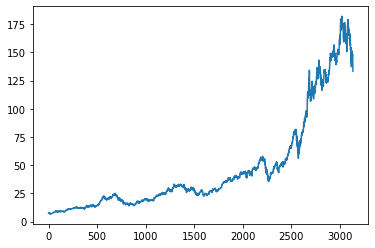

In [10]:
plt.plot(df.Close)

In [11]:
ma_100 = df.Close.rolling(100).mean()
ma_200 = df.Close.rolling(200).mean()

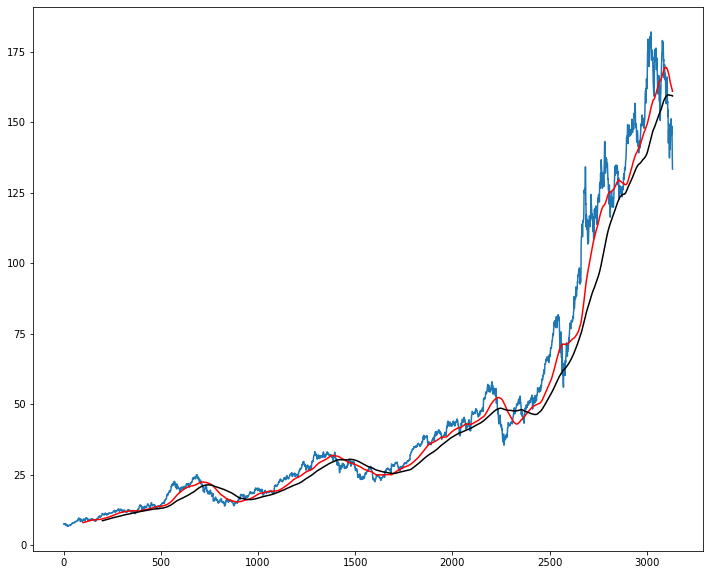

In [12]:
plt.figure(figsize=(12,10))
plt.plot(df.Close)
plt.plot(ma_100,'r')
plt.plot(ma_200, 'black')

In [13]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume'], dtype='object')

In [14]:
#Data splitting
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

In [15]:
data_test.head()

,Close
2193,54.592499
2194,55.007500
2195,54.415001
2196,55.197498
2197,55.547501


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_array = scaler.fit_transform(data_train)
data_test_array = scaler.fit_transform(data_test)

In [18]:
data_train_array

array([[0.01561354],
       [0.01587662],
       [0.01345211],
       ...,
       [0.97750394],
       [0.94784107],
       [0.94963279]])

In [19]:
X_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
  X_train.append(data_train_array[i-100:i])
  y_train.append(data_train_array[i,0])

In [28]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [29]:
X_train.shape

(2093, 100, 1)

In [30]:
data_train_array[1]

array([0.01587662])

In [31]:
X_train[1]

array([[1.58766206e-02],
       [1.34521125e-02],
       [1.31748067e-02],
       [1.41702103e-02],
       [1.28406575e-02],
       [1.11413479e-02],
       [1.32245778e-02],
       [1.23571666e-02],
       [9.86866696e-03],
       [1.63458723e-02],
       [1.39924752e-02],
       [1.13901941e-02],
       [4.05268768e-03],
       [7.83520821e-03],
       [9.87577712e-03],
       [1.12551200e-02],
       [5.14762409e-03],
       [7.10066871e-06],
       [1.90546635e-03],
       [2.70889562e-03],
       [5.10496312e-03],
       [0.00000000e+00],
       [2.42448916e-03],
       [1.47175598e-03],
       [2.94353095e-03],
       [2.18275316e-03],
       [4.70680356e-03],
       [5.92262221e-03],
       [8.06984354e-03],
       [7.46549880e-03],
       [7.73566595e-03],
       [6.83980458e-03],
       [5.95105336e-03],
       [3.56209603e-03],
       [6.12170673e-03],
       [7.07443991e-03],
       [8.93725478e-03],
       [1.20443384e-02],
       [1.19447962e-02],
       [1.22860555e-02],


In [32]:
import tensorflow as tf

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences= True,
               input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=70, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

NotImplementedError: Cannot convert a symbolic Tensor (lstm_2/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [35]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train, epochs=50)

Epoch 1/50
66/66 [==============================] - 21s 240ms/step - loss: 0.0350
Epoch 2/50
66/66 [==============================] - 16s 240ms/step - loss: 0.0092
Epoch 3/50
66/66 [==============================] - 17s 264ms/step - loss: 0.0081
Epoch 4/50
66/66 [==============================] - 17s 264ms/step - loss: 0.0075
Epoch 5/50
66/66 [==============================] - 17s 257ms/step - loss: 0.0064
Epoch 6/50
66/66 [==============================] - 16s 240ms/step - loss: 0.0058
Epoch 7/50
66/66 [==============================] - 16s 239ms/step - loss: 0.0060
Epoch 8/50
66/66 [==============================] - 16s 239ms/step - loss: 0.0054
Epoch 9/50
66/66 [==============================] - 16s 243ms/step - loss: 0.0052
Epoch 10/50
66/66 [==============================] - 16s 244ms/step - loss: 0.0050
Epoch 11/50
66/66 [==============================] - 16s 242ms/step - loss: 0.0043
Epoch 12/50
66/66 [==============================] - 17s 255ms/step - loss: 0.0045
Epoch 13/50
6

In [ ]:

!mkdir -p saved_model
#model.save('saved_model/my_model') 

model.save('final_project/model')

INFO:tensorflow:Assets written to: final_project/model/assets


INFO:tensorflow:Assets written to: final_project/model/assets


In [ ]:
# my_model directory
!ls final_project

# Contains an assets folder, saved_model.pb, and variables folder.
!ls final_project/model

LSTM  LSTM1  LSTM.h5  model
assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
data_test.head()

,Close
2192,54.560001
2193,54.592499
2194,55.007500
2195,54.415001
2196,55.197498


In [ ]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
past_100_days = data_train.tail(100)

In [ ]:
past_100_days

,Close
2092,41.055000
2093,40.580002
2094,41.314999
2095,42.275002
2096,44.142502
...,...
2187,55.962502
2188,55.267502
2189,56.602501
2190,55.959999


In [ ]:
final_df = past_100_days.append(data_test, ignore_index= True)

In [ ]:
final_df.head()

,Close
0,41.055000
1,40.580002
2,41.314999
3,42.275002
4,44.142502


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data.shape

(1040, 1)

In [ ]:
X_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  X_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [ ]:
X_test , y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test.shape

(940, 100, 1)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_test

array([0.1298114 , 0.13003328, 0.13286677, 0.12882138, 0.13416403,
       0.13655373, 0.13353247, 0.14126483, 0.14261331, 0.14520781,
       0.1486558 , 0.15341813, 0.14645388, 0.14013825, 0.13925067,
       0.14454211, 0.12660237, 0.12334215, 0.13641717, 0.1283093 ,
       0.13648544, 0.13484681, 0.12602203, 0.13163779, 0.13392506,
       0.13747546, 0.12443458, 0.13247419, 0.12649996, 0.11956987,
       0.1213792 , 0.13086968, 0.13660494, 0.1114449 , 0.10139113,
       0.10511224, 0.115661  , 0.11316891, 0.10630708, 0.08872578,
       0.08541435, 0.07614578, 0.08401469, 0.08763335, 0.07454126,
       0.05938379, 0.05904241, 0.05137833, 0.05535546, 0.05470684,
       0.06614321, 0.06377059, 0.06211488, 0.07276608, 0.0588888 ,
       0.05552616, 0.04489204, 0.04678673, 0.04513101, 0.04593327,
       0.04909106, 0.03975419, 0.03712555, 0.0407613 , 0.03191943,
       0.02498933, 0.0145771 , 0.00792012, 0.02556968, 0.02382861,
       0.02396517, 0.02654264, 0.02684987, 0.        , 0.01036

In [ ]:
scaler.scale_

array([0.00682769])

In [ ]:
scale = 1/0.00682769
y_predict = y_predict*scale
y_test = y_test*scale

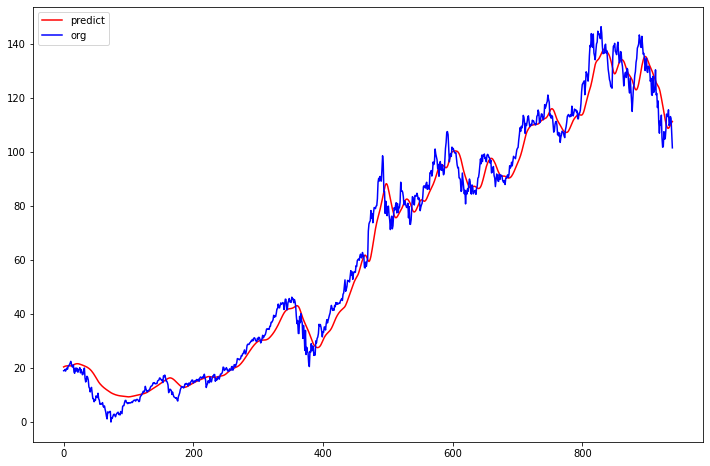

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_predict,'r',label='predict')
plt.plot(y_test,'b',label='org')
plt.legend()

In [ ]:
import tensorflow as tf
from tensorflow import keras